# Udacity Projeto 2 - Titanic
![O Titanic parado em Queenstown, 11 de abril em 1952](titanic_imagem.jpg "O Titanic parado em Queenstown, 11 de abril 1952")

## Estrutura do projeto:
- apresentar o projeto e a origem dos dados
- introdução sobre o assunto
- analise superficial sobre os dados
- data wrangling

- perguntas que desejamos responder

- análise dos dados explicando e criando os gráficos
- resultados respondendo também as questões e problemas encontrados

### Apresentação do projeto e origem dos dados

___Projeto 2 do curso de DATA SCIENCE da Udacity___

Neste projeto iremos analisar o dataset que contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.

Dados disponiveis no site da [Kaggle](https://www.kaggle.com/c/titanic/data)

Maiores informações sobre o Titanic podem ser consultadas no [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

In [1]:
# Importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Importando os dados
df_titanic = pd.read_csv('titanic_data.csv')

In [3]:
# Prévia dos dados
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Cabeçalhos
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Para facilitar os trabalhos iremos renomear as colunas, deixando todas em minusculo

In [5]:
# Renomeando os cabeçalhos

for coluna in df_titanic.columns:
    df_titanic.rename(columns={coluna: coluna.lower()}, inplace=True)

In [6]:
df_titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### Descrição das colunas

- PassengerID = ID do Passageiro
- Survivved = Sobrevivente | _0 = Não, 1 = Sim_
- Pclass = Classe do passageiro | _1 = Primeira Classe , 2 = Segunda Classe, 3 = Terceira Classe_
- Name = Nome do Passageiro
- Sex	= Sexo
- Age	= Idade em anos
- Sibsp = Irmãos ou conjugês a bordo do Titanic
- Parch =	Pais ou filhos a bordo do Titanic
- Ticket = Numero do ticket 
- Fare = Valor da passagem
- Cabin = Numero da cabine
- Embarked = Porto de Embarque | _C = Cherbourg, Q = Queenstown, S = Southampton_

## Iremos analisar

- Total de Registros
    - Sobreviventes
    - Por CLASSE
    - Por GENERO
    - Porto de Embarque


- Analisando a quantidade de sobreviventes por:
    - Sobreviventes
    - Por CLASSE
    - Por Idade
    - Por genero
    - Se possuia parentes a bordo


- Comparativos de sobreviventes considerando
    - Classe
    - Idade
    - Genero
    - Se possuia parentes a bordo

### Data Wrangling

In [7]:
# Tamanho do nosso dataframe
print('Nosso dataframe possui {} linhas e {} colunas'.format(str(df_titanic.shape[0]),str(df_titanic.shape[1])))

Nosso dataframe possui 891 linhas e 12 colunas


In [8]:
# Verificando o tipo das colunas
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Identificando dados ausentes
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

#### Colunas com dados ausentes
- age
- cabin
- embarked

Como iremos utilizar a coluna age em nossas analises, iremos preencher os dados ausentes com a média

In [10]:
# Coluna age

female_mean = df_titanic.query('sex == "female"')['age'].mean() #media de idade das mulheres
male_mean = df_titanic.query('sex == "male"')['age'].mean() #media de idade dos homens

# Atualizando as idades em branco com o valor da média de acordo com o genero
df_titanic.loc[(df_titanic.sex == 'female') & (df_titanic.age.isnull()), 'age'] = female_mean
df_titanic.loc[(df_titanic.sex == 'male') & (df_titanic.age.isnull()), 'age'] = male_mean

In [11]:
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

As colunas __CABIN__ e __EMBARKED__ não irão atrapalhar as analises, não iremos atualiza-las ou remove-las da base

### Funções

In [12]:
def conta_info(coluna):
    """
    Retorna o grupo de tipos e suas quantidades
    Argumentos:
    coluna: coluna que será manipulada.
    Retorna:
    Os tipos existentes e suas respectitivas quantidades de ocorrencias.
    """
    return df_titanic.groupby(coluna)[coluna].count()

In [13]:
def conta_sob(coluna):
    """
    Retorna o grupo de tipos e suas quantidades dos SOBREVIVENTES
    Argumentos:
    coluna: coluna que será manipulada.
    Retorna:
    Os tipos existentes e suas respectitivas quantidades de ocorrencias.
    """
    return df_titanic.query('survived == "1"').groupby(coluna)[coluna].count()

## Total de Registros

In [14]:
# Total de passageiros
total_passageiros = df_titanic.shape[0]
print('Total de passageiros em nosso dataframe = {}'.format(total_passageiros))

Total de passageiros em nosso dataframe = 891


#### Sobreviventes
Obs. Nosso dataframe possui __891 linhas__ e segundo [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic#Passageiros) o Titanic partiu em sua primeira e única viagem com __1316__ passageiros a bordo

In [15]:
# Quantidade passageiros que sobreviveram ou não
sobreviventes = conta_info('survived')
print('Segundo nossos dados, temos {} sobreviventes'.format(sobreviventes[1]))

Segundo nossos dados, temos 342 sobreviventes


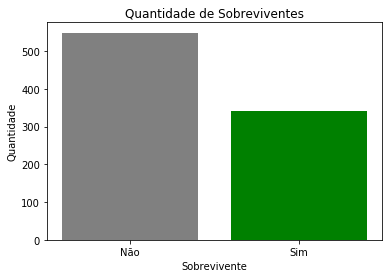

In [16]:
# Plotando um gráfico de sobreviventes
plt.bar(sobreviventes.index,sobreviventes, tick_label=['Não','Sim'], color=('Gray','Green'))
plt.title('Quantidade de Sobreviventes')
plt.xlabel('Sobrevivente')
plt.ylabel('Quantidade');

#### Por Classe
Dados do [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic#Passageiros): 325 na primeira classe, 285 na segunda e 706 na terceira

In [17]:
# Quantidade de passageiros por classe
qtde_classe = conta_info('pclass')
print('Quantidade de Passageiros por CLASSE\n Primeira Classe: {}\n Segunda Classe: {}\n Terceira Classe: {}'
      .format(qtde_classe[1],qtde_classe[2],qtde_classe[3]))

Quantidade de Passageiros por CLASSE
 Primeira Classe: 216
 Segunda Classe: 184
 Terceira Classe: 491


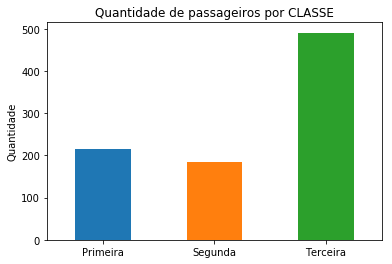

In [50]:
# Plotando um grático da quantidade de passageiros por classe
classe = list(set(df_titanic['pclass']))
qtde_classe.plot(kind='bar')
plt.title('Quantidade de passageiros por CLASSE')
plt.xticks((0,1,2), ('Primeira','Segunda','Terceira'), rotation=0)
plt.xlabel('')
plt.ylabel('Quantidade');

Podemos observar pelo gráfico que a grande diferença na quantidade de passageiros na __terceira classe__

In [32]:
# Proporção dos Passageiros por Classe
print('Proporção de cada classe em relação ao total de passageiros')
qtde_classe / total_passageiros

Proporção de cada classe em relação ao total de passageiros


pclass
1    0.242424
2    0.206510
3    0.551066
Name: pclass, dtype: float64

#### Por GENERO

In [33]:
# Quantidade de passageiros por genero
qtde_genero = conta_info('sex')
print('Total de {} mulheres e {} homens '
     .format(qtde_genero['female'],qtde_genero['male']))

Total de 314 mulheres e 577 homens 


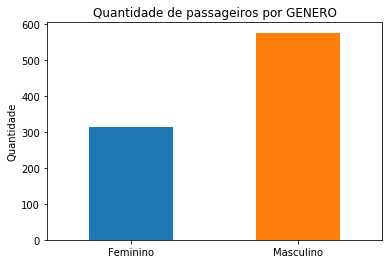

In [39]:
# Plotando um gráfico da quantidade de passageiros por genero
genero = list(set(df_titanic['sex']))
#plt.bar(genero,qtde_genero, tick_label=['Feminino','Masculno'])
qtde_genero.plot(kind='bar')
plt.xticks((0,1), ('Feminino','Masculino'), rotation=0)
plt.title('Quantidade de passageiros por GENERO')
plt.xlabel('')
plt.ylabel('Quantidade');

Acima é possível notar que a quantidade de passageiros do sexo masculino é quase o dobro do feminino.

#### Por IDADE

Devido a diversidade de idades, iremos classifica-las, sendo dividida da seguinte forma:
- Criança - 19 anos de idade
- Adulto - até 60
- Terceira Idade - a partir dos 60 anos

In [40]:
# Classificando as idades

class_idade = []
for idade in df_titanic['age']:
    if idade <= 19.:
        class_idade.append('Criança')
    elif idade <= 59.:
        class_idade.append('Adulto')
    else:
        class_idade.append('Terceira Idade')
    
df_titanic['class_idade'] = class_idade

In [41]:
qtde_idade = conta_info('class_idade')
print('Idade média dos passageiros: {:.1f} anos'
     .format(df_titanic['age'].mean()))
print('\nTotal de passageiros por IDADE:\n Crianças: {}\n Adultos: {}\n Terceira Idade: {}'
     .format(qtde_idade['Criança'],qtde_idade['Adulto'],qtde_idade['Terceira Idade']))

Idade média dos passageiros: 29.7 anos

Total de passageiros por IDADE:
 Crianças: 164
 Adultos: 701
 Terceira Idade: 26


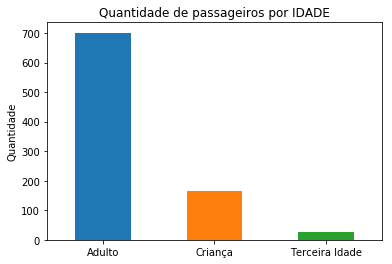

In [44]:
#plt.bar(qtde_idade.index,qtde_idade)
qtde_idade.plot(kind='bar')
plt.title('Quantidade de passageiros por IDADE')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Quantidade');

A grande maioria dos passageiros eram __adultos__, uma porcentagem pequena de __crianças__ e uma bem menor de passageiros na __teceira idade__.

#### Por PORTO DE EMBARQUE
Dados do [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic#Passageiros): 922 embarcaram em Southampton, 274 em Cherbourg-Octeville na França e 120 em Queenstown na Irlanda.

In [45]:
# Quantidade de passageiros por porto de embarque
qtde_porto = conta_info('embarked')
print('Total de passageiros por porto de embarque:\n Cherbourg: {}\n Queenstown: {}\n Southampton: {}'
     .format(qtde_porto['C'],qtde_porto['Q'],qtde_porto['S']))

Total de passageiros por porto de embarque:
 Cherbourg: 168
 Queenstown: 77
 Southampton: 644


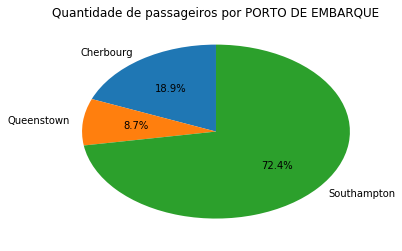

In [46]:
# Plotando um gráfico de quantidade de passageiros por porto de embarque
plt.pie(qtde_porto, labels=['Cherbourg','Queenstown','Southampton'], startangle=90, autopct='%.1f%%')
plt.title('Quantidade de passageiros por PORTO DE EMBARQUE');

O porto de Southampton foi onde o Titanic início sua viagem, por isso temos a grande porcentagem de passageiros embarcados neste porto.

In [47]:
# Quantidade de passageiros embarcados em cada porto, por classe.
df_titanic.groupby(['embarked','pclass'])['pclass'].count()

embarked  pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: pclass, dtype: int64

Acima apenas uma visão da quantidade de passageiros embarcados em cada porto, separados por classe

## Analisando os sobreviventes

### Por CLASSE

In [48]:
# Quantidade de sobreviventes por CLASSE
sob_classe = conta_sob('pclass')
print('Sobreviventes por CLASSE\n Primeira Classe: {}\n Segunda Classe: {}\n Terceira Classe: {}'
     .format(sob_classe[1],sob_classe[2],sob_classe[3]))

Sobreviventes por CLASSE
 Primeira Classe: 136
 Segunda Classe: 87
 Terceira Classe: 119


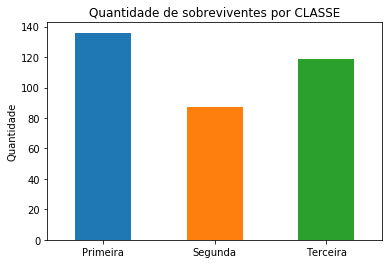

In [51]:
# Plotando um gráfico de sobreviventes por CLASSE
#plt.bar(sob_classe.index,sob_classe, tick_label=['Primeira','Segunda','Terceira'])
sob_classe.plot(kind='bar')
plt.title('Quantidade de sobreviventes por CLASSE')
plt.xticks((0,1,2), ('Primeira','Segunda','Terceira'), rotation=0)
plt.xlabel('')
plt.ylabel('Quantidade');

Vimos anteriormente que a __terceira classe__ representava a maioria dos passageiros embarcados, mas agora podemos observar que na analise de sobreviventes prevalece os da __primeira classe__

In [52]:
sob_genero = conta_sob('sex')
print('Sobreviventes por GENERO:\n {} mulheres\n {} homens'
     .format(sob_genero['female'],sob_genero['male']))

Sobreviventes por GENERO:
 233 mulheres
 109 homens


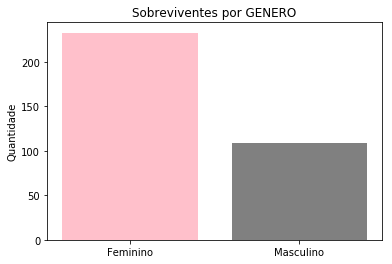

In [55]:
genero = ('Feminino', 'Masculino')
plt.bar(genero,sob_genero, color=("pink","gray"))
plt.title('Sobreviventes por GENERO')
plt.ylabel('Quantidade');

Assim como na classe, na analise dos sobreviventes por gênero observamos uma inversão nos valores, passando o numero de __mulheres__ ser o dobro da de __homens__

### Por IDADE

In [56]:
# Quantidade de sobreviventes por IDADE
sob_idade = conta_sob('class_idade')
print('Idade média dos sobreviventes: {:.1f} anos'.format(df_titanic.query('survived == 1')['age'].mean()))
print('\nTotal de sobreviventes por IDADE:\n Crianças: {}\n Adultos: {}\n Terceira Idade: {}'
     .format(sob_idade['Criança'],sob_idade['Adulto'],sob_idade['Terceira Idade']))

Idade média dos sobreviventes: 28.4 anos

Total de sobreviventes por IDADE:
 Crianças: 79
 Adultos: 256
 Terceira Idade: 7


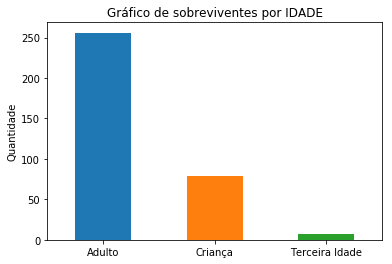

In [60]:
# Plotando um gráfico dos sobreviventes por IDADE
#plt.bar(sob_idade.index,sob_idade)
sob_idade.plot(kind="bar")
plt.title('Gráfico de sobreviventes por IDADE')
plt.xlabel('')
plt.ylabel('Quantidade')
plt.xticks(rotation=0);

O gráfico de sobreviventes por idade não demonstra uma diferença visível em relação ao gráfico do total de passageiros, iremos comparar melhor mais a frente no projeto.

In [61]:
maior_idade = df_titanic.query('survived == 1')['age'].max()
menor_idade = df_titanic.query('survived == 1')['age'].min()
print('O sobrevivente mais idoso tinha {} anos e o mais novo {} anos '
     .format(maior_idade,menor_idade))

O sobrevivente mais idoso tinha 80.0 anos e o mais novo 0.42 anos 


In [62]:
print('Sobrevivente com maior idade')
df_titanic[df_titanic['age'] == maior_idade]

Sobrevivente com maior idade


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_idade
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,Terceira Idade


In [63]:
print('Sobrevivente com menor idade')
df_titanic[df_titanic['age'] == menor_idade]

Sobrevivente com menor idade


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_idade
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Criança


### Classificando passageiros acompanhados ou não
#### Passageiros que possuem informação na coluna Sibsp ou Parch terão na coluna 'acompanhado' a informação SIM

In [64]:
acompanhado = []
pos = 0
for registro in range(len(df_titanic)):
    if df_titanic['sibsp'][pos] > 0 or df_titanic['parch'][pos] > 0:
        acompanhado.append('SIM')
    else:
        acompanhado.append('NÃO')
    pos += 1
    
df_titanic['acompanhado'] = acompanhado

In [65]:
sob_acompanhado = conta_sob('acompanhado')
print('{} sobreviventes que viajam acompanhados\n{} sobreviventes que viajavam sozinhos'
      .format(sob_acompanhado['SIM'],sob_acompanhado['NÃO']))

179 sobreviventes que viajam acompanhados
163 sobreviventes que viajavam sozinhos


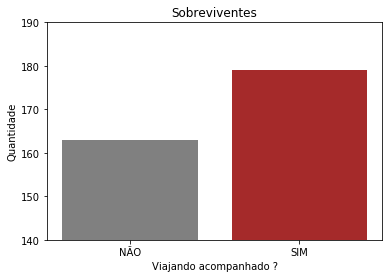

In [66]:
plt.bar(sob_acompanhado.index,sob_acompanhado, color=("Gray","Brown"))
plt.ylim(140,190)
plt.title('Sobreviventes')
plt.xlabel('Viajando acompanhado ?')
plt.ylabel('Quantidade');

O número de passageiros acompanhados não possui grande diferença com os que viajavam sozinhos, o que não nos permite dizer que foi fator determinante na sobrevivência.

### Analise dos dados

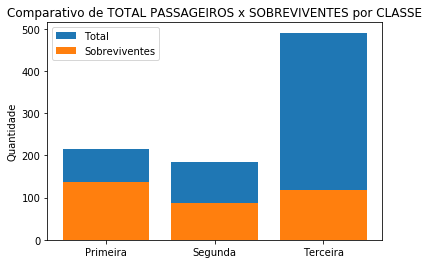

In [67]:
# A classe foi fator determinante para a sobrevivencia ?
classes = ['Primeira','Segunda','Terceira']
plt.bar(qtde_classe.index,qtde_classe, tick_label=classes, label='Total')
plt.bar(sob_classe.index,sob_classe, label='Sobreviventes')
plt.title('Comparativo de TOTAL PASSAGEIROS x SOBREVIVENTES por CLASSE')
plt.ylabel('Quantidade')
plt.legend();

É visivel pelo gráfico que proporcionalmente a quantidade de passageiros da __Primeira Classe__ que sobreviveram é maior que o da __Segunda Classe__ e esta ao da __Terceira__.

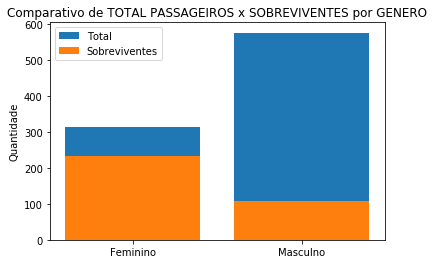

In [68]:
# Mulheres e Crianças primeiro ?

plt.bar(genero,qtde_genero, tick_label=['Feminino','Masculno'], label='Total')
plt.bar(genero,sob_genero, label='Sobreviventes')
plt.title('Comparativo de TOTAL PASSAGEIROS x SOBREVIVENTES por GENERO')
plt.ylabel('Quantidade')
plt.legend();

O gráfico acima mostra que a proporção de __mulheres__ que sobreviveram é superior a de __homens__

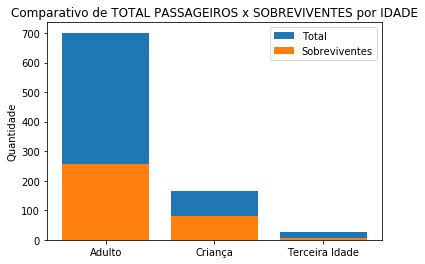

In [69]:
plt.bar(qtde_idade.index,qtde_idade, label='Total')
plt.bar(sob_idade.index,sob_idade, label='Sobreviventes')
plt.title('Comparativo de TOTAL PASSAGEIROS x SOBREVIVENTES por IDADE')
plt.ylabel('Quantidade')
plt.legend();

Para termos uma melhor ideia das proporções por idade:

In [70]:
#Proporção de sobreviventes por IDADE
print('Proporção de SOBREVIVENTES X TOTAL PASSAGEIROS')
print(qtde_idade / total_passageiros)

Proporção de SOBREVIVENTES X TOTAL PASSAGEIROS
class_idade
Adulto            0.786756
Criança           0.184063
Terceira Idade    0.029181
Name: class_idade, dtype: float64


Se olharmos a proporção dentro do __TOTAL DE PASSAGEIROS__, iremos observar que a proporção de __adultos__ sobreviventes é maior que a de __crianças__ e __teceira idade__

In [71]:
print('\nProporção de SOBREVIVENTE POR IDADE X PASSAGEIROS POR IDADE')
print(sob_idade / qtde_idade)
#Estamos calculado a proporção por grupo de idade e não pelo total de passageiros


Proporção de SOBREVIVENTE POR IDADE X PASSAGEIROS POR IDADE
class_idade
Adulto            0.365193
Criança           0.481707
Terceira Idade    0.269231
Name: class_idade, dtype: float64


Mas ao olhar a proporção de sobreviventes por grupo de idade, a proporção de __crianças__ que sobreviveram é maior que a de __adultos__ e esta é maior que __terceira idade__

## Outras observações

### Nomes - Mulheres

In [72]:
# Observação sobre a coluna name

df_titanic[df_titanic['sex'] == 'female'].head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_idade,acompanhado
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto,SIM
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto,NÃO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto,SIM
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adulto,SIM
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Criança,SIM


Em alguns registros podemos observar que o __nome da mulher__ esta entre parentes e antes é exibido o nome do marido, seria uma característica de cadastro da época ?

### Valor das Passagens

In [73]:
max_fare = df_titanic['fare'].max()
min_fare = df_titanic['fare'].min()
print('O valor mais alto pago por uma passagem do Titanic foi de ${:.2f} e o valor mais baixo ${}'
     .format(max_fare,min_fare))

O valor mais alto pago por uma passagem do Titanic foi de $512.33 e o valor mais baixo $0.0


In [74]:
print('Passageiros que pagaram o maior valor de passagem')
df_titanic.query('fare == @max_fare')

Passageiros que pagaram o maior valor de passagem


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_idade,acompanhado
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Adulto,NÃO
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adulto,SIM
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Adulto,NÃO


Segundo os registros, os passageiros que pagaram o maior valor de passagem estão entre os sobreviventes.

Pesquisando pelo nome dos sobreviventes, encontramos a informação de que se trata de uma comitiva composta por 4 passageiros, não localizamos na base informações relacionadas a passageira __Charlotte Drake Cardeza__ que seria a responsável da comitiva.
[Informações sobre os passageiros](https://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html)

In [75]:
# Valor igual a zero ?
tarifa_zero = df_titanic.query('fare == 0')
print('Temos um total de {} passageiros com valor de passagem = ZERO'
      .format(tarifa_zero.shape[0]))

Temos um total de 15 passageiros com valor de passagem = ZERO


In [76]:
# Os passageiros com tarifa = zero

print('Passageiros com tarifa = ZERO')
print(tarifa_zero['name'])

Passageiros com tarifa = ZERO
179                 Leonard, Mr. Lionel
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
277         Parkes, Mr. Francis "Frank"
302     Johnson, Mr. William Cahoone Jr
413      Cunningham, Mr. Alfred Fleming
466               Campbell, Mr. William
481    Frost, Mr. Anthony Wood "Archie"
597                 Johnson, Mr. Alfred
633       Parr, Mr. William Henry Marsh
674          Watson, Mr. Ennis Hastings
732                Knight, Mr. Robert J
806              Andrews, Mr. Thomas Jr
815                    Fry, Mr. Richard
822     Reuchlin, Jonkheer. John George
Name: name, dtype: object


In [77]:
# Os passageiros com tarifa = ZERO sobreviveram ?
print('Dos {} passageiros com tarifa ZERO apenas {} sobreviveram'
      .format(tarifa_zero.shape[0],tarifa_zero.query('survived == 1')['name'].count()))
tarifa_zero.query('survived == 1')

Dos 15 passageiros com tarifa ZERO apenas 1 sobreviveram


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class_idade,acompanhado
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Adulto,NÃO


Porcentagens para a conclusão

In [78]:
#Calculando as porcentagens para apresentação da conclusão
porc_sob_sim = int((sobreviventes[1] / total_passageiros) * 100)
porc_sob_mulheres = int((sob_genero['female'] / sobreviventes[1]) * 100)
porc_sob_1classe = int((sob_classe[1] / qtde_classe[1]) * 100)
porc_sob_2classe = int((sob_classe[2] / qtde_classe[2]) * 100)
porc_sob_3classe = int((sob_classe[3] / qtde_classe[3]) * 100)

## Conclusão

Podemos concluir que a __classe social__ foi fator que contou muito na sobrevivência, bem como o __gênero__ e __idade__, mas ainda vemos que o numero de sobreviventes foi inferior ao de mortes.

In [79]:
print('Do total de {} passageiros, apenas {}% sobreviveram, sendo {}% Mulheres'
     .format(total_passageiros,porc_sob_sim,porc_sob_mulheres))
print('O indice de sobrevivencia por classe foi de {}% da PRIMEIRA, {}% da SEGUNDA e apenas {}% da TERCEIRA'
      .format(porc_sob_1classe,porc_sob_2classe,porc_sob_3classe))

Do total de 891 passageiros, apenas 38% sobreviveram, sendo 68% Mulheres
O indice de sobrevivencia por classe foi de 62% da PRIMEIRA, 47% da SEGUNDA e apenas 24% da TERCEIRA


### Limitações

Verificamos no início da análise dos dados que alguns campos não possuíam informações, sendo eles: __AGE, CABIN e EMBARKED__.

Medidas tomadas:
    - AGE: os dados foram preenchidos com a média de idade de acordo com o gênero.
    - CABIN e EMBARKED: não influenciariam nas análises e, portanto, não foram alteradas.

#### Bibliografia

[MARKDOWN, formatação dos textos e imagens](https://daringfireball.net/projects/markdown/syntax)

[Informações sobre o TITANIC](https://pt.wikipedia.org/wiki/RMS_Titanic)

[Informações sobre os PASSAGEIROS](https://www.encyclopedia-titanica.org/)

[Formatação do gráfico PIZZA](https://medium.com/python-pandemonium/data-visualization-in-python-pie-charts-in-matplotlib-c71fb0fe5c56)

Fabiano Lima - 04/12/2018